# **Introduzione al Machine Learning -- laboratorio 19--20**

* Regressione lineare multipla
* Intervallo di confidenza per la risposta media
* Intervallo di predizione per la risposta futura
* Uso di formule stile R


* Curva OC per il test di controllo qualità



In [24]:
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# fetch dataset
servo = fetch_ucirepo(id=87)

# data (as pandas dataframes)
X = servo.data.features
y = servo.data.targets

# metadata
print(servo.metadata)

# variable information
print(servo.variables)

{'uci_id': 87, 'name': 'Servo', 'repository_url': 'https://archive.ics.uci.edu/dataset/87/servo', 'data_url': 'https://archive.ics.uci.edu/static/public/87/data.csv', 'abstract': 'Data was from a simulation of a servo system', 'area': 'Computer Science', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 167, 'num_features': 4, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1986, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C5Q30F', 'creators': ['Karl Ulrich'], 'intro_paper': None, 'additional_info': {'summary': 'Ross Quinlan:\r\n\r\nThis data was given to me by Karl Ulrich at MIT in 1986.  I didn\'t record his description at the time, but here\'s his subsequent (1992) recollection:\r\n \r\n"I seem to remember that the data was from a simulation of a servo system involving a servo amplifier, a mot

In [25]:
X.head()

,motor,screw,pgain,vgain
0,E,E,5,4
1,B,D,6,5
2,D,D,4,3
3,B,A,3,2
4,D,B,6,5


In [26]:
y.head() # DataFrame

,class
0,0.281251
1,0.506252
2,0.356251
3,5.500033
4,0.356251


In [27]:
y = y['class']  # Series
y.head()

0    0.281251
1    0.506252
2    0.356251
3    5.500033
4    0.356251
Name: class, dtype: float64

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

Ricostruisco il modello finale

In [29]:
Xr = sm.add_constant(pd.get_dummies(X, dtype=int).drop(columns=['motor_A','motor_B','screw_E','screw_D']).join(X[['pgain','vgain']]**2, rsuffix='_2').join(X['vgain']**3, rsuffix='_3'))
Xr.head()

,const,pgain,vgain,motor_C,motor_D,motor_E,screw_A,screw_B,screw_C,pgain_2,vgain_2,vgain_3
0,1.0,5,4,0,0,1,0,0,0,25,16,64
1,1.0,6,5,0,0,0,0,0,0,36,25,125
2,1.0,4,3,0,1,0,0,0,0,16,9,27
3,1.0,3,2,0,0,0,1,0,0,9,4,8
4,1.0,6,5,0,1,0,0,1,0,36,25,125


In [72]:
lm = sm.OLS(np.log(y), Xr).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     83.49
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.62e-59
Time:                        13:08:55   Log-Likelihood:                -57.180
No. Observations:                 167   AIC:                             138.4
Df Residuals:                     155   BIC:                             175.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.2155      0.867     15.235      0.0

In [74]:
print(lm.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.845   
Dependent Variable: class            AIC:                138.3601
Date:               2024-05-08 13:09 BIC:                175.7760
No. Observations:   167              Log-Likelihood:     -57.180 
Df Model:           11               F-statistic:        83.49   
Df Residuals:       155              Prob (F-statistic): 2.62e-59
R-squared:          0.856            Scale:              0.12512 
------------------------------------------------------------------
              Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
------------------------------------------------------------------
const        13.2155    0.8675   15.2346  0.0000  11.5019  14.9290
pgain        -5.4936    0.3737  -14.7021  0.0000  -6.2317  -4.7554
vgain        -1.0922    0.4003   -2.7284  0.0071  -1.8830  -0.3014
motor_C      -0.1755    0.0718   -2.4448  0.0156  -0.3173  -0.0337
motor_D      -0.8111

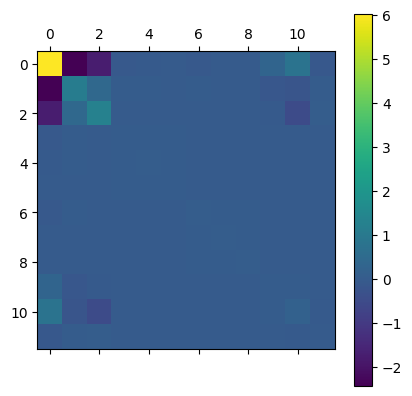

In [75]:
cov = np.linalg.inv(Xr.T @ Xr)
plt.matshow(cov)
plt.colorbar()
plt.show()

In [77]:
B = cov @ Xr.T @ np.log(y)
B

0     13.215462
1     -5.493554
2     -1.092217
3     -0.175483
4     -0.811101
5     -0.405401
6      0.749135
7      0.423050
8      0.082021
9      0.523153
10     0.619916
11    -0.079369
dtype: float64

In [78]:
lm.params

const      13.215462
pgain      -5.493554
vgain      -1.092217
motor_C    -0.175483
motor_D    -0.811101
motor_E    -0.405401
screw_A     0.749135
screw_B     0.423050
screw_C     0.082021
pgain_2     0.523153
vgain_2     0.619916
vgain_3    -0.079369
dtype: float64

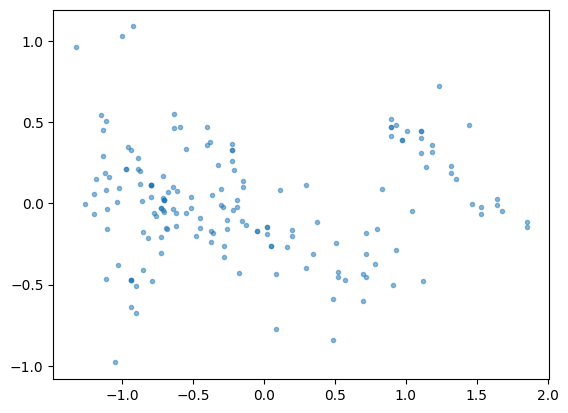

In [99]:
# Previsti, residui, SSR, Se², Se

logy_pred = Xr @ B.values
resid = np.log(y) - logy_pred
plt.plot(logy_pred, resid, '.', alpha=0.5)
plt.show()
SSR = np.sum(np.square(resid)) # 19.392912838093487
Se2 = SSR / lm.df_resid        # 0.12511556669737733 ~ scale
Se = np.sqrt(Se2)              # 0.3537167888260004

In [107]:
n = len(y) # 167

In [119]:
# SSy, Sy, R²d, R²a

SSy = np.sum(np.square(np.log(y) - np.log(y).mean())) # 134.2965385087062
SSy_ = np.var(np.log(y), ddof=1) * (n-1)              # 134.2965385087062
print(lm.centered_tss)                                # 134.2965385087062

Sy = np.sqrt(SSy / (n-1))                             # 0.89945277375809
Sy_ = np.std(np.log(y), ddof=1)                       # 0.89945277375809

R2d = 1-SSR/SSy                                       # 0.8555963314211834
print(lm.rsquared)                                    # 0.8555963314211834

R2a = 1-Se2/Sy**2                                     # 0.8453483291349448
print(lm.rsquared_adj)                                # 0.8453483291349448

134.2965385087062
0.8555963314211834
0.8453483291349448


In [97]:
lm.scale

0.12511556669737742

In [98]:
lm.mse_resid

0.12511556669737742

In [94]:
lm.df_resid

155.0

In [93]:
lm.ssr

19.392912838093498

In [89]:
resid[0:4]

0   -0.159773
1    0.115991
2    0.007668
3   -0.147833
dtype: float64

In [87]:
lm.resid[0:4]

0   -0.159773
1    0.115991
2    0.007668
3   -0.147833
dtype: float64

C'è ancora la possibilità di migliorare, ma ci fermiamo qui

**stin22tst03 3.3** Usare il modello del punto precedente per prevedere al 95% di confidenza il tempo medio di azionamento nella configurazione A, C, 4, 4

In [127]:
Xm = X.copy()
Xm.loc['new'] = ['A', 'C', 4, 4]
Xm.tail()

,motor,screw,pgain,vgain
163,B,E,3,1
164,C,D,4,3
165,A,B,3,2
166,A,A,6,5
new,A,C,4,4


In [128]:
Xm = sm.add_constant(pd.get_dummies(Xm, dtype=int).drop(columns=['motor_A','motor_B','screw_E','screw_D']).join(Xm[['pgain','vgain']]**2, rsuffix='_2').join(Xm['vgain']**3, rsuffix='_3'))
Xm.tail()

,const,pgain,vgain,motor_C,motor_D,motor_E,screw_A,screw_B,screw_C,pgain_2,vgain_2,vgain_3
163,1.0,3,1,0,0,0,0,0,0,9,1,1
164,1.0,4,3,1,0,0,0,0,0,16,9,27
165,1.0,3,2,0,0,0,0,1,0,9,4,8
166,1.0,6,5,0,0,0,1,0,0,36,25,125
new,1.0,4,4,0,0,0,0,0,1,16,16,64


In [133]:
# Stima puntuale

logy_predict = lm.predict(Xm.loc['new'])
ypred = np.exp(logy_predict)
print(logy_predict)
print(ypred)

None    0.163865
dtype: float64
None    1.178055
dtype: float64


In [132]:
Xm.loc['new'] @ B.values # Stesso valore, calcolato direttamente

0.16386472357310478

In [139]:
k = Xm.loc['new'] @ cov @ Xm.loc['new'] # 0.09813694903842596   x.T (cov) x

In [135]:
Se

0.3537167888260004

In [137]:
from scipy.stats import t

conf = 0.95
alpha = 1 - conf
q = t.ppf(1 - alpha/2, df=lm.df_resid)      # 1.9753871310468782

In [140]:
r = q * Se * np.sqrt(k)
r

0.2188891173027853

In [144]:
np.array(logy_predict) + np.array([-r,r])            # Intervallo di confidenza per log(y)

array([-0.05502439,  0.38275384])

In [145]:
np.exp(np.array(logy_predict) + np.array([-r,r]))    # Intervallo di confidenza per y

array([0.94646206, 1.46631704])

In [148]:
pr = lm.get_prediction(Xm.loc['new'])

In [150]:
pr.se

array([0.11080821])

In [151]:
Se * np.sqrt(k)

0.11080821265995723

In [153]:
pr.conf_int()                            # Intervallo di confidenza per log(y), di default al 95%

array([[-0.05502439,  0.38275384]])

In [154]:
pr.conf_int(alpha=0.10)                  # Intervallo di confidenza per log(y), al 90%

array([[-0.01949448,  0.34722392]])

In [155]:
pr.conf_int(obs=True)                    # Intervallo di predizione per un log(y) futuro

array([[-0.5683461 ,  0.89607555]])

In [156]:
r1 = q * Se * np.sqrt(1+k)
r1

0.7322108265034911

In [157]:
np.array(logy_predict) + np.array([-r1,r1]) # Intervallo di predizione per un log(y) futuro

array([-0.5683461 ,  0.89607555])

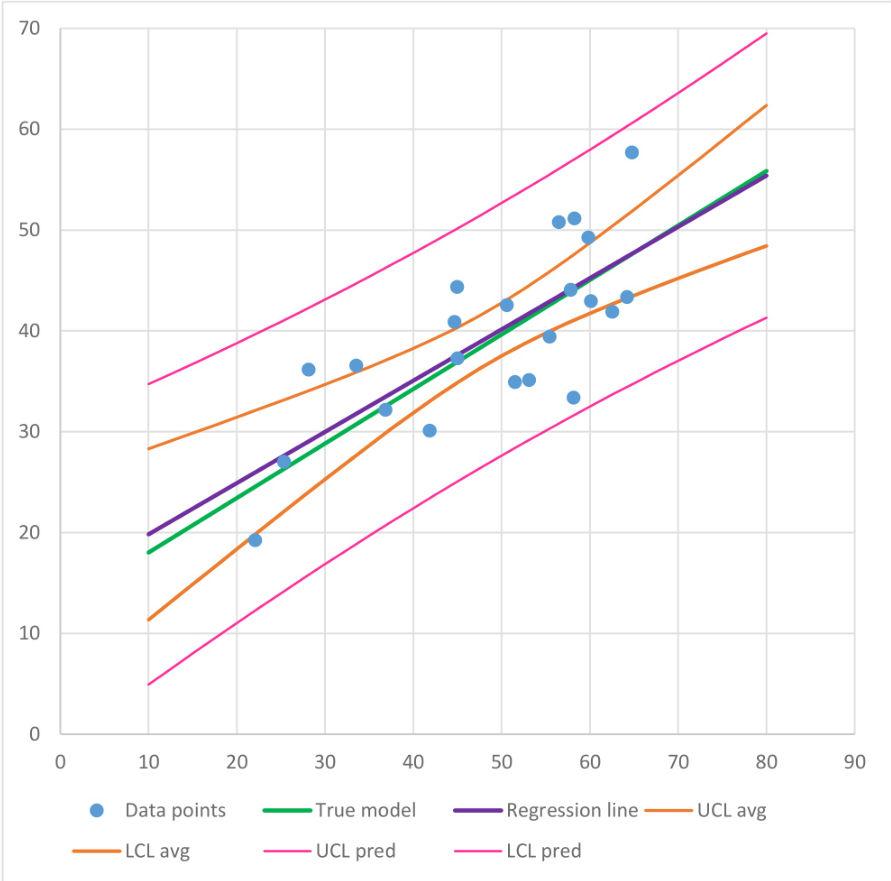

HW: riprodurre l'immagine sopra in python

Uso delle formule patsy in stile R.

In [158]:
 import statsmodels.formula.api as smf

In [160]:
X['time'] = y

In [161]:
X.head()

,motor,screw,pgain,vgain,time
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [164]:
smf.ols(formula='time ~ motor + screw + pgain + vgain', data=X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     19.68
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.98e-23
Time:                        14:11:42   Log-Likelihood:                -242.54
No. Observations:                 167   AIC:                             507.1
Df Residuals:                     156   BIC:                             541.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9561      0.504     15.802      0.000       6.962       8.951
motor[T.B]    -0.0792      0.252     -0.314      0.754      -0.577       0.419
motor[T.C]    -0.2666      0.248     -1.075      0.284      -0.757       0.223
motor[T.D]    -1.4303      0.294     -4.858      0.000      -2.012      -0.849
motor[T.E]    -0.6864      0.258     -2.659      0.009      -1.196      -0.177
screw[T.B]    -0.7207      0.248     -2.908      0.004      -1.210      -0.231
screw[T.C]    -1.0825      0.258     -4.191      0.000      -1.593      -0.572
screw[T.D]    -1.2055      0.261     -4.613      0.000      -1.722      -0.689
screw[T.E]    -1.1657      0.264     -4.410      0.000      -1.688      -0.644
pgain         -1.6435      0.147    -11.150      0.000      -1.935      -1.352
vgain          0.5670      0.108      5.260      0.000       0.354       0.780
==============================================================================
Omnibus:                       21.115   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.122
Skew:                           0.855   Prob(JB):                     3.51e-06
Kurtosis:                       3.827   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [165]:
smf.ols(formula='np.log(time) ~ motor + screw + pgain + vgain', data=X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(time)   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     30.58
Date:                Wed, 08 May 2024   Prob (F-statistic):           5.98e-32
Time:                        14:13:35   Log-Likelihood:                -128.15
No. Observations:                 167   AIC:                             278.3
Df Residuals:                     156   BIC:                             312.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0449      0.254     15.936      0.000       3.544       4.546
motor[T.B]    -0.0653      0.127     -0.514      0.608      -0.316       0.186
motor[T.C]    -0.1163      0.125     -0.930      0.354      -0.363       0.131
motor[T.D]    -0.7653      0.148     -5.156      0.000      -1.059      -0.472
motor[T.E]    -0.4203      0.130     -3.230      0.002      -0.677      -0.163
screw[T.B]    -0.4086      0.125     -3.271      0.001      -0.655      -0.162
screw[T.C]    -0.7299      0.130     -5.605      0.000      -0.987      -0.473
screw[T.D]    -0.7987      0.132     -6.063      0.000      -1.059      -0.538
screw[T.E]    -0.7945      0.133     -5.962      0.000      -1.058      -0.531
pgain         -1.0832      0.074    -14.577      0.000      -1.230      -0.936
vgain          0.4158      0.054      7.651      0.000       0.308       0.523
==============================================================================
Omnibus:                        1.028   Durbin-Watson:                   2.153
Prob(Omnibus):                  0.598   Jarque-Bera (JB):                1.128
Skew:                           0.173   Prob(JB):                        0.569
Kurtosis:                       2.794   Cond. No.                         37.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [166]:
smf.ols(formula='np.log(time) ~ motor + screw + pgain * vgain', data=X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(time)   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     39.43
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.20e-39
Time:                        14:15:35   Log-Likelihood:                -107.32
No. Observations:                 167   AIC:                             238.6
Df Residuals:                     155   BIC:                             276.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.4867      0.432     15.028      0.000       5.634       7.339
motor[T.B]     -0.0653      0.113     -0.580      0.562      -0.288       0.157
motor[T.C]     -0.0766      0.111     -0.691      0.491      -0.296       0.142
motor[T.D]     -0.7974      0.132     -6.062      0.000      -1.057      -0.538
motor[T.E]     -0.4278      0.115     -3.712      0.000      -0.655      -0.200
screw[T.B]     -0.4649      0.111     -4.189      0.000      -0.684      -0.246
screw[T.C]     -0.7911      0.116     -6.838      0.000      -1.020      -0.563
screw[T.D]     -0.8608      0.117     -7.354      0.000      -1.092      -0.630
screw[T.E]     -0.8685      0.119     -7.326      0.000      -1.103      -0.634
pgain          -1.6465      0.108    -15.316      0.000      -1.859      -1.434
vgain          -0.5579      0.155     -3.608      0.000      -0.863      -0.252
pgain:vgain     0.2068      0.031      6.626      0.000       0.145       0.268
==============================================================================
Omnibus:                       26.471   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.177
Skew:                           0.679   Prob(JB):                     8.56e-14
Kurtosis:                       5.609   Cond. No.                         194.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [168]:
smf.ols(formula='np.log(time) ~ motor + screw + pgain + I(pgain**2) + vgain + I(vgain**2) + I(vgain**3)', data=X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(time)   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     70.06
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.61e-57
Time:                        14:17:23   Log-Likelihood:                -56.841
No. Observations:                 167   AIC:                             141.7
Df Residuals:                     153   BIC:                             185.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.9978      0.868     16.133      0.000      12.284      15.712
motor[T.B]       -0.0653      0.084     -0.780      0.436      -0.231       0.100
motor[T.C]       -0.2082      0.083     -2.497      0.014      -0.373      -0.043
motor[T.D]       -0.8440      0.098     -8.616      0.000      -1.038      -0.651
motor[T.E]       -0.4381      0.086     -5.109      0.000      -0.607      -0.269
screw[T.B]       -0.3261      0.084     -3.882      0.000      -0.492      -0.160
screw[T.C]       -0.6671      0.087     -7.644      0.000      -0.840      -0.495
screw[T.D]       -0.7439      0.088     -8.442      0.000      -0.918      -0.570
screw[T.E]       -0.7546      0.089     -8.460      0.000      -0.931      -0.578
pgain            -5.4937      0.375    -14.637      0.000      -6.235      -4.752
I(pgain ** 2)     0.5232      0.046     11.289      0.000       0.432       0.615
vgain            -1.0922      0.402     -2.716      0.007      -1.887      -0.298
I(vgain ** 2)     0.6199      0.162      3.826      0.000       0.300       0.940
I(vgain ** 3)    -0.0794      0.019     -4.076      0.000      -0.118      -0.041
==============================================================================
Omnibus:                        3.560   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.169   Jarque-Bera (JB):                3.497
Skew:                           0.184   Prob(JB):                        0.174
Kurtosis:                       3.606   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
fm = smf.ols(formula='np.log(time) ~ pgain + vgain + motor_C + motor_D + motor_E + screw_A + screw_B + screw_C + I(pgain**2) + vgain + I(vgain**2) + I(vgain**3)', data=pd.get_dummies(X)).fit()
print(fm.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(time)   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     83.49
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.62e-59
Time:                        14:22:55   Log-Likelihood:                -57.180
No. Observations:                 167   AIC:                             138.4
Df Residuals:                     155   BIC:                             175.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.2155      0.867     

In [170]:
' + '.join(pd.get_dummies(X).columns)

'pgain + vgain + time + motor_A + motor_B + motor_C + motor_D + motor_E + screw_A + screw_B + screw_C + screw_D + screw_E'

Un caso di curva OC: il test di Bernoulli

Ricevo un lotto di 50000 pezzi e ne testo (per protocollo di QC) n=30.  Rifiuto il lotto se trovo più di k=2 difettosi.

Tracciare la curva OC di questo test.

In [176]:
# Curva OC h(p), p la probabilità di un pezzo difettoso (nel lotto).
# X il numero di difettosi che trovo nel campione, X~bin(n,p)
# Accetto il lotto (e H0) se X≤k
# Rifiuto il lotto (e H0) se X>k

# h(p)=P(X≤k)

from scipy.stats import binom

h = lambda p: binom.cdf(k, n=n, p=p)


In [180]:
k=2

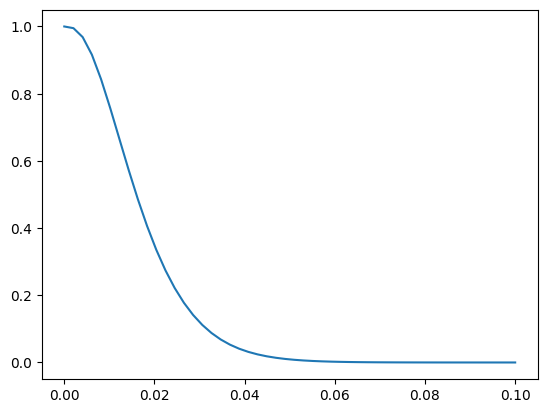

In [182]:
p_range = np.linspace(0,0.1)
plt.plot(p_range, h(p_range))
plt.show()